# Inactivity & Obesity Analysis

# Imported Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import numpy as np

# Source

In [2]:
inactivity_source_path = Path("Resources/500_Cities__No_leisure-time_physical_activity_among_adults_aged___18_years_20240314.csv")
obesity_source_path = Path("Resources/500_Cities__Obesity_among_adults_aged___18_years_20240318.csv")
inactivity_source_data = pd.read_csv(inactivity_source_path)
obesity_source_data = pd.read_csv(obesity_source_path)

# State Analysis

Filtered and Cleaned Source Data

In [3]:
filtered_inactivity_source_data = inactivity_source_data[["StateDesc", "Data_Value", "PopulationCount"]]
percentage = filtered_inactivity_source_data["Data_Value"]*0.01
inactivity_population = percentage * filtered_inactivity_source_data["PopulationCount"]
inactivity_population = round(inactivity_population)
inactivity_population = inactivity_population.rename("InactivityPopulation")
filtered_inactivity_source_data = pd.concat([filtered_inactivity_source_data, inactivity_population],axis = 1)
filtered_inactivity_source_data = filtered_inactivity_source_data[filtered_inactivity_source_data["Data_Value"].notna()]
calculation_data = filtered_inactivity_source_data.groupby(by = "StateDesc").sum()
percentage = calculation_data["InactivityPopulation"]/calculation_data["PopulationCount"]
state_filtered_inactivity_source_data = percentage.rename("Inactivity_Percentage")

In [4]:
filtered_obesity_source_data = obesity_source_data[["StateDesc", "Data_Value", "PopulationCount"]]
percentage = filtered_obesity_source_data["Data_Value"]*0.01
obesity_population = percentage * filtered_obesity_source_data["PopulationCount"]
obesity_population = round(obesity_population)
obesity_population = obesity_population.rename("ObesityPopulation")
filtered_obesity_source_data = pd.concat([filtered_obesity_source_data, obesity_population],axis = 1)
filtered_obesity_source_data = filtered_obesity_source_data[filtered_obesity_source_data["Data_Value"].notna()]
calculation_data = filtered_obesity_source_data.groupby(by = "StateDesc").sum()
percentage = calculation_data["ObesityPopulation"]/calculation_data["PopulationCount"]
state_filtered_obesity_source_data = percentage.rename("Obesity_Percentage")

In [5]:
state_inactivity_obesity_source_data = pd.merge(state_filtered_obesity_source_data, state_filtered_inactivity_source_data,how = "inner", on = ["StateDesc"])
state_inactivity_obesity_source_data = state_inactivity_obesity_source_data.drop(index = ["United States","District of C"])
state_inactivity_obesity_source_data_sorted_by_inactivity = state_inactivity_obesity_source_data.sort_values(by = ["Inactivity_Percentage"], ascending = False)
state_inactivity_obesity_source_data_sorted_by_obesity = state_inactivity_obesity_source_data.sort_values(by = ["Obesity_Percentage"], ascending = False)
state_inactivity_obesity_source_data.to_csv("state_inactivity_obesity_source_data.csv")
state_inactivity_obesity_source_data.head()

,Obesity_Percentage,Inactivity_Percentage
StateDesc,,
Alabama,0.376937,0.339465
Alaska,0.341658,0.210097
Arizona,0.294218,0.252504
Arkansas,0.331304,0.323608
California,0.247809,0.213992


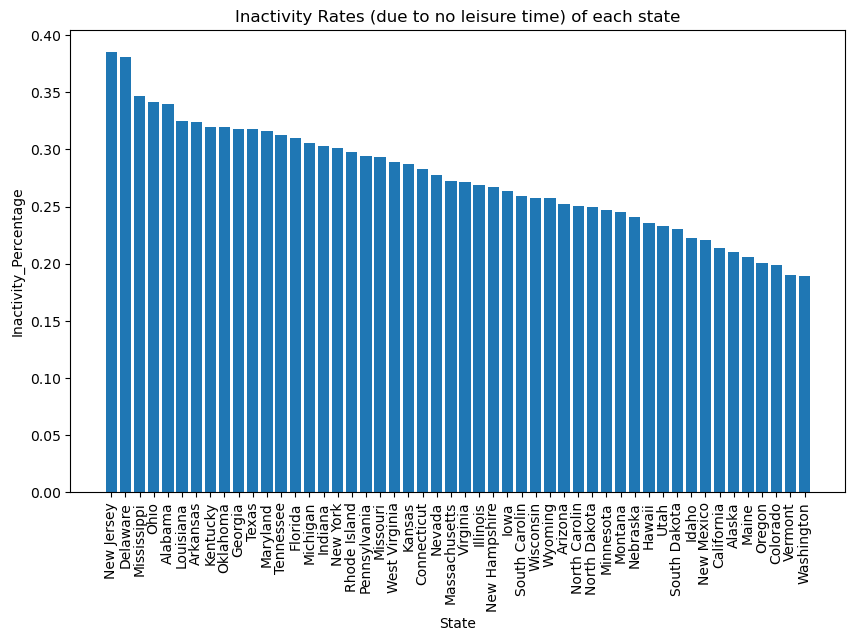

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(state_inactivity_obesity_source_data_sorted_by_inactivity.index, state_inactivity_obesity_source_data_sorted_by_inactivity['Inactivity_Percentage'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Inactivity_Percentage")
plt.xlabel("State")
plt.title("Inactivity Rates (due to no leisure time) of each state")
plt.savefig("Inactivity Rates (due to no leisure time) of each state", bbox_inches = "tight")
plt.show()

In [7]:
## Bar Plots by Percentage

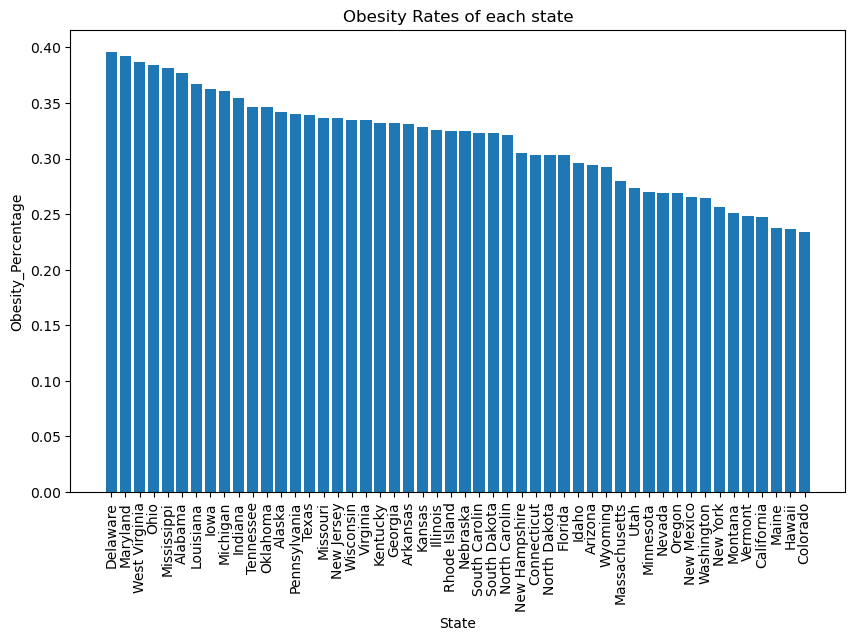

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(state_inactivity_obesity_source_data_sorted_by_obesity.index, state_inactivity_obesity_source_data_sorted_by_obesity['Obesity_Percentage'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Obesity_Percentage")
plt.xlabel("State")
plt.title("Obesity Rates of each state")
plt.savefig("Obesity Rates of each state", bbox_inches = "tight")
plt.show()

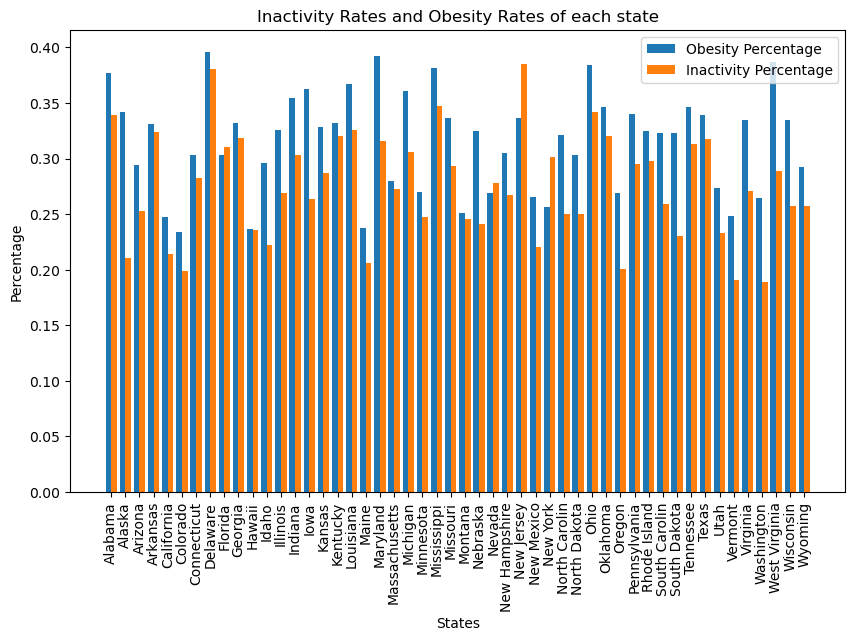

In [9]:
x_label = state_inactivity_obesity_source_data.index
obesity_data = state_inactivity_obesity_source_data["Obesity_Percentage"]
inactivity_data = state_inactivity_obesity_source_data["Inactivity_Percentage"]
x_axis = np.arange(len(x_label))
plt.figure(figsize=(10, 6))
plt.bar(x_axis-0.2, obesity_data, 0.4, label = "Obesity Percentage")
plt.bar(x_axis+0.2, inactivity_data, 0.4, label = "Inactivity Percentage")
plt.xticks(x_axis, x_label, rotation = 90)
plt.title("Inactivity Rates and Obesity Rates of each state")
plt.xlabel("States")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("Inactivity Rates and Obesity Rates of each state", bbox_inches = "tight")
plt.show()

In [10]:
stat_state_inactivity_obesity_source_data_sorted_by_inactivity = state_inactivity_obesity_source_data_sorted_by_inactivity.describe()
stat_state_inactivity_obesity_source_data_sorted_by_inactivity

,Obesity_Percentage,Inactivity_Percentage
count,50.000000,50.000000
mean,0.315700,0.274909
std,0.044649,0.048090
min,0.233509,0.189232
25%,0.275274,0.242270
50%,0.324973,0.271739
75%,0.341216,0.312321
max,0.395835,0.385349


## Scatter Plot by Percentage

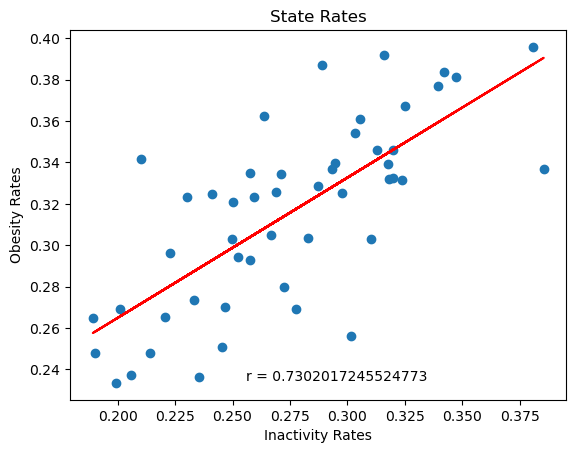

In [11]:
plt.scatter(inactivity_data, obesity_data)
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(inactivity_data, obesity_data)
p_fit = p_slope*inactivity_data+p_int
plt.plot(inactivity_data, p_fit, color = "red")
plt.title("State Rates")
plt.xlabel("Inactivity Rates")
plt.ylabel("Obesity Rates")
plt.figtext(0.4, 0.15, f"r = {str(p_r)}")
plt.savefig("State Rates", bbox_inches = "tight")
plt.show()

## most populated States

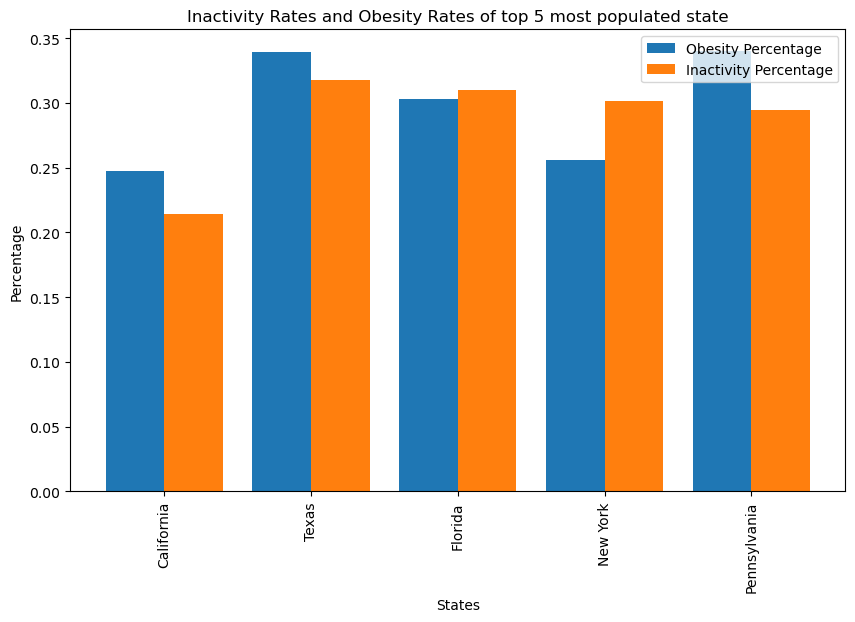

In [12]:
most_populated_state_inactivity_obesity_source_data_sorted_by_inactivity = state_inactivity_obesity_source_data_sorted_by_inactivity.loc[["California","Texas","Florida","New York","Pennsylvania"]]
x_label = most_populated_state_inactivity_obesity_source_data_sorted_by_inactivity.index
x_axis = np.arange(len(x_label))
plt.figure(figsize=(10, 6))
plt.bar(x_axis-0.2, most_populated_state_inactivity_obesity_source_data_sorted_by_inactivity["Obesity_Percentage"], 0.4, label = "Obesity Percentage")
plt.bar(x_axis+0.2, most_populated_state_inactivity_obesity_source_data_sorted_by_inactivity["Inactivity_Percentage"], 0.4, label = "Inactivity Percentage")
plt.xticks(x_axis, x_label, rotation = 90)
plt.title("Inactivity Rates and Obesity Rates of top 5 most populated state")
plt.xlabel("States")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("Inactivity Rates and Obesity Rates of top 5 most populated state", bbox_inches = "tight")
plt.show()

# City Analysis

In [13]:
filtered_city_inactivity_data = inactivity_source_data[["StateAbbr","CityName","Data_Value","PopulationCount"]]
filtered_city_inactivity_data = filtered_city_inactivity_data[filtered_city_inactivity_data["Data_Value"].notna()]
filtered_city_inactivity_data = pd.concat([filtered_city_inactivity_data,inactivity_population],axis = 1)
filtered_city_inactivity_data = filtered_city_inactivity_data.groupby(by = "CityName")[["PopulationCount","InactivityPopulation"]].mean()
city_inactivity_percentage = filtered_city_inactivity_data["InactivityPopulation"]/filtered_city_inactivity_data["PopulationCount"]
city_inactivity_percentage.name = "CityInactivityPercentage"
filtered_city_inactivity_data = pd.concat([filtered_city_inactivity_data, city_inactivity_percentage], axis = 1)
stat_filtered_city_inactivity_data = filtered_city_inactivity_data.describe()
filtered_city_inactivity_data.head()

,PopulationCount,InactivityPopulation,CityInactivityPercentage
CityName,,,
Abilene,9004.692308,2976.333333,0.330531
Akron,8784.176471,3265.500000,0.371748
Alameda,12302.000000,2051.388889,0.166752
Albany,9561.272727,3170.000000,0.331546
Albuquerque,11780.611511,2615.438849,0.222012


In [14]:
stat_filtered_city_inactivity_data

,PopulationCount,InactivityPopulation,CityInactivityPercentage
count,474.000000,474.000000,474.000000
mean,11258.184448,2925.861578,0.263055
std,2383.665527,849.313537,0.062648
min,5928.005747,1248.933333,0.128247
25%,9724.901879,2344.994804,0.214968
50%,11090.526667,2787.324074,0.261533
75%,12579.983902,3353.251571,0.307871
max,22527.600000,7571.363636,0.443822


In [15]:
filtered_city_obesity_data = obesity_source_data[["StateAbbr", "CityName" ,"Data_Value","PopulationCount"]]
filtered_city_obesity_data = filtered_city_obesity_data[filtered_city_obesity_data["Data_Value"].notna()]
filtered_city_obesity_data = pd.concat([filtered_city_obesity_data, obesity_population],axis = 1)
filtered_city_obesity_data = filtered_city_obesity_data.groupby(by = "CityName")[["PopulationCount","ObesityPopulation"]].mean()
city_obesity_percentage = filtered_city_obesity_data["ObesityPopulation"]/filtered_city_obesity_data["PopulationCount"]
city_obesity_percentage.name = "CityObesityPercentage"
filtered_city_obesity_data = pd.concat([filtered_city_obesity_data, city_obesity_percentage], axis = 1)
stat_filtered_city_obesity_data = filtered_city_obesity_data.describe()
filtered_city_obesity_data.head()

,PopulationCount,ObesityPopulation,CityObesityPercentage
CityName,,,
Abilene,9004.692308,3035.179487,0.337066
Akron,8784.176471,3316.323529,0.377534
Alameda,12302.000000,2463.444444,0.200247
Albany,9561.272727,3321.636364,0.347405
Albuquerque,11780.611511,3187.589928,0.270579


In [16]:
stat_filtered_city_obesity_data

,PopulationCount,ObesityPopulation,CityObesityPercentage
count,474.000000,474.000000,474.000000
mean,11258.184448,3326.733104,0.299116
std,2383.665527,852.272429,0.059706
min,5928.005747,1356.700000,0.154976
25%,9724.901879,2770.672249,0.258508
50%,11090.526667,3197.877240,0.301723
75%,12579.983902,3720.942949,0.341758
max,22527.600000,8594.363636,0.492386


## Scatter Plot by Percentage

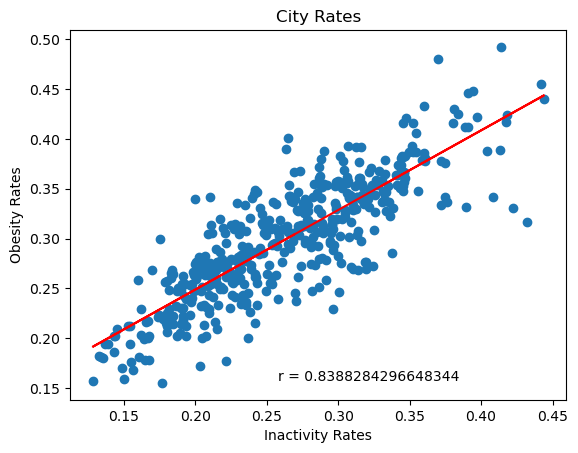

In [17]:
plt.scatter(filtered_city_inactivity_data["CityInactivityPercentage"], filtered_city_obesity_data["CityObesityPercentage"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(filtered_city_inactivity_data["CityInactivityPercentage"], filtered_city_obesity_data["CityObesityPercentage"])
p_fit = p_slope*filtered_city_inactivity_data["CityInactivityPercentage"]+p_int
plt.plot(filtered_city_inactivity_data["CityInactivityPercentage"], p_fit, color = "red")
plt.title("City Rates")
plt.xlabel("Inactivity Rates")
plt.ylabel("Obesity Rates")
plt.figtext(.45,0.15, f"r = {p_r}")
plt.savefig('City Rates')
plt.show()

<bound method Figure.show of <Figure size 640x480 with 2 Axes>>

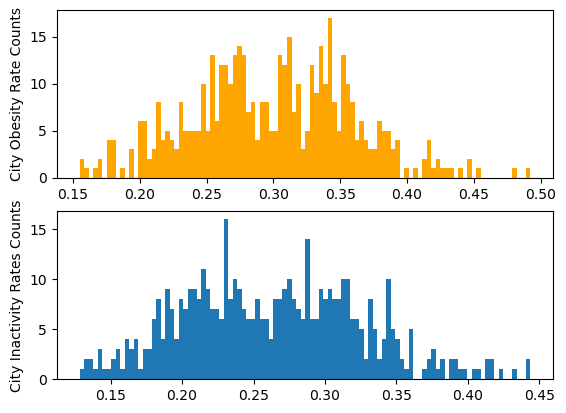

In [18]:
fig, (ax1 ,ax2) = plt.subplots(2)
ax1.hist(filtered_city_obesity_data["CityObesityPercentage"], bins=100, color = "Orange")
ax1.set_ylabel("City Obesity Rate Counts")
ax2.hist(filtered_city_inactivity_data["CityInactivityPercentage"], bins=100)
ax2.set_ylabel("City Inactivity Rates Counts")
fig.savefig("Distribution of rates")
fig.show

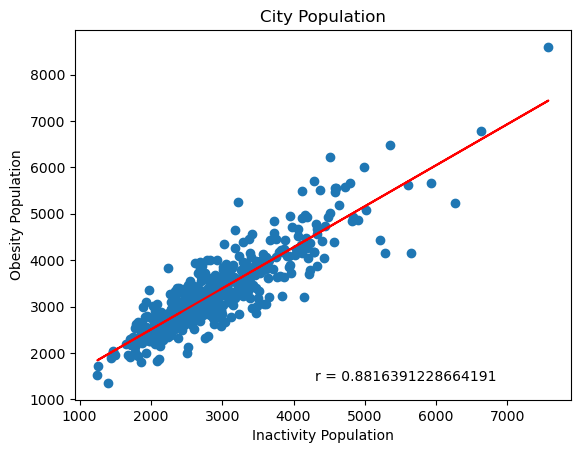

In [19]:
plt.scatter(filtered_city_inactivity_data["InactivityPopulation"], filtered_city_obesity_data["ObesityPopulation"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(filtered_city_inactivity_data["InactivityPopulation"], filtered_city_obesity_data["ObesityPopulation"])
p_fit = p_slope*filtered_city_inactivity_data["InactivityPopulation"]+p_int
plt.plot(filtered_city_inactivity_data["InactivityPopulation"], p_fit, color = "red")
plt.title("City Population")
plt.xlabel("Inactivity Population")
plt.ylabel("Obesity Population")
plt.figtext(0.5, 0.15, f'r = {p_r}')
plt.savefig("City Population")
plt.show()

# County Analysis

In [20]:
county_data_source = Path("Resources/uscities.csv")
county_data = pd.read_csv(county_data_source)
county_data = county_data[["city", "county_name"]]
county_data = county_data.rename(columns = {"city": "CityName", "county_name": "CountyName"})
county_data = county_data.drop_duplicates(subset = ["CityName"])

In [21]:
county_inactivity_data = filtered_city_inactivity_data.merge(county_data, on = "CityName", how = "left")
county_inactivity_data = county_inactivity_data.groupby(by = "CountyName")[["PopulationCount", "InactivityPopulation"]].sum()
county_inactivity_percentage = county_inactivity_data["InactivityPopulation"]/county_inactivity_data["PopulationCount"]
county_inactivity_percentage.name = "CountyInactivityPercentage"
county_inactivity_data = county_inactivity_data.merge(county_inactivity_percentage, on = "CountyName", how = "left")

In [22]:
county_obesity_data = filtered_city_obesity_data.merge(county_data, on = "CityName", how = "left")
county_obesity_data = county_obesity_data.groupby(by = "CountyName")[["PopulationCount", "ObesityPopulation"]].sum()
county_obesity_percentage = county_obesity_data["ObesityPopulation"]/county_obesity_data["PopulationCount"]
county_obesity_percentage.name = "CountyObesityPercentage"
county_obesity_data = county_obesity_data.merge(county_obesity_percentage, on = "CountyName", how = "left")

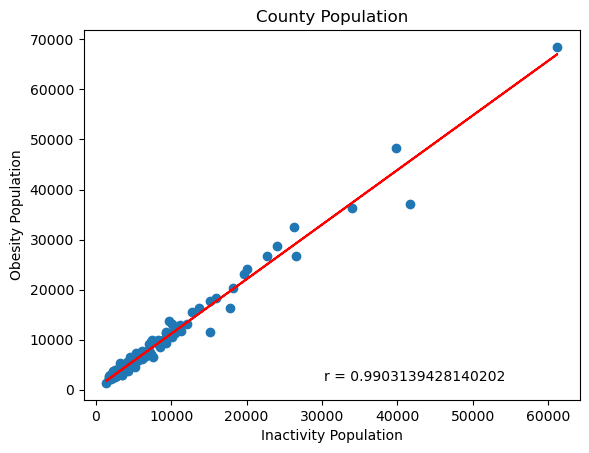

In [23]:
plt.scatter(county_inactivity_data["InactivityPopulation"],county_obesity_data["ObesityPopulation"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(county_inactivity_data["InactivityPopulation"],county_obesity_data["ObesityPopulation"])
p_fit = p_slope*county_inactivity_data["InactivityPopulation"]+p_int
plt.plot(county_inactivity_data["InactivityPopulation"], p_fit, color = "red")
plt.title("County Population")
plt.ylabel("Obesity Population")
plt.xlabel("Inactivity Population")
plt.figtext(0.5, 0.15, f'r = {p_r}')
plt.savefig("County Population")
plt.show()

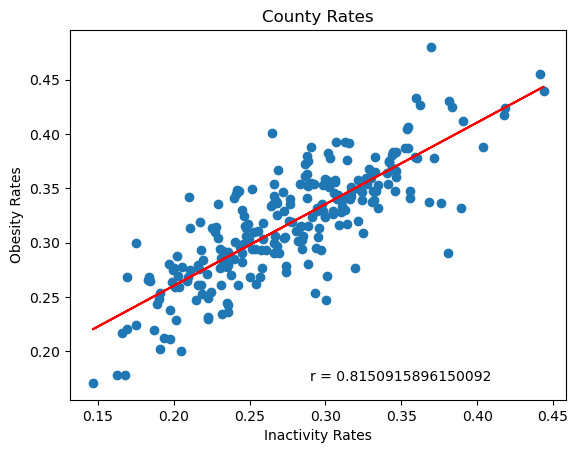

In [24]:
plt.scatter(county_inactivity_data["CountyInactivityPercentage"],county_obesity_data["CountyObesityPercentage"])
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(county_inactivity_data["CountyInactivityPercentage"],county_obesity_data["CountyObesityPercentage"])
p_fit = p_slope*county_inactivity_data["CountyInactivityPercentage"]+p_int
plt.plot(county_inactivity_data["CountyInactivityPercentage"], p_fit, color = "red")
plt.title("County Rates")
plt.xlabel("Inactivity Rates")
plt.ylabel("Obesity Rates")
plt.figtext(0.5, 0.15, f'r = {p_r}')
plt.savefig("County Rates")
plt.show()

# Inactivity & Obesity vs Heart Disease Analysis

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import hvplot.pandas
from scipy.stats import linregress


In [26]:
# Reads the data that will be used 

data_csv = pd.read_csv("Resources/500_Cities__Coronary_heart_disease_among_adults_aged___18_years_20240317.csv")

data_csv.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,%,...,4.8,NaN,NaN,144186,"(37.6329591551, -122.077051051)",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
1,2017,AL,Alabama,Huntsville,City,BRFSS,Health Outcomes,0137000,Coronary heart disease among adults aged >=18 ...,%,...,6.8,NaN,NaN,180105,"(34.6989692671, -86.6387042882)",HLTHOUT,CHD,137000.0,NaN,Coronary Heart Disease
2,2017,AZ,Arizona,Chandler,City,BRFSS,Health Outcomes,0412000,Coronary heart disease among adults aged >=18 ...,%,...,3.9,NaN,NaN,236123,"(33.28318981, -111.852210033)",HLTHOUT,CHD,412000.0,NaN,Coronary Heart Disease
3,2017,AZ,Arizona,Surprise,City,BRFSS,Health Outcomes,0471510,Coronary heart disease among adults aged >=18 ...,%,...,6.1,NaN,NaN,117517,"(33.6803835177, -112.452218439)",HLTHOUT,CHD,471510.0,NaN,Coronary Heart Disease
4,2017,CA,California,Bellflower,City,BRFSS,Health Outcomes,0604982,Coronary heart disease among adults aged >=18 ...,%,...,5.4,NaN,NaN,76616,"(33.8880417923, -118.127100236)",HLTHOUT,CHD,604982.0,NaN,Coronary Heart Disease


In [27]:
# Shows all the unique values under the State Description column

data_csv['StateDesc'].unique()

array(['California', 'Alabama', 'Arizona', 'District of C', 'Florida',
       'Colorado', 'Kansas', 'Illinois', 'Kentucky', 'Maine',
       'Massachusetts', 'Michigan', 'North Carolin', 'North Dakota',
       'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolin', 'Tennessee',
       'Texas', 'Utah', 'Washington', 'Wisconsin', 'Alaska',
       'United States', 'Arkansas', 'Connecticut', 'Delaware', 'Nebraska',
       'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Louisiana',
       'Maryland', 'New Mexico', 'Minnesota', 'Nevada', 'Mississippi',
       'Missouri', 'Montana', 'New Jersey', 'New Hampshire', 'New York',
       'Rhode Island', 'Oregon', 'South Dakota', 'Virginia', 'Vermont',
       'West Virginia', 'Wyoming'], dtype=object)

In [28]:
# Drops District of Columbia from the State Description column

states_df = data_csv.drop(data_csv.loc[data_csv['StateDesc'] == 'District of C', :].index)

states_df.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,%,...,4.8,NaN,NaN,144186,"(37.6329591551, -122.077051051)",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
1,2017,AL,Alabama,Huntsville,City,BRFSS,Health Outcomes,0137000,Coronary heart disease among adults aged >=18 ...,%,...,6.8,NaN,NaN,180105,"(34.6989692671, -86.6387042882)",HLTHOUT,CHD,137000.0,NaN,Coronary Heart Disease
2,2017,AZ,Arizona,Chandler,City,BRFSS,Health Outcomes,0412000,Coronary heart disease among adults aged >=18 ...,%,...,3.9,NaN,NaN,236123,"(33.28318981, -111.852210033)",HLTHOUT,CHD,412000.0,NaN,Coronary Heart Disease
3,2017,AZ,Arizona,Surprise,City,BRFSS,Health Outcomes,0471510,Coronary heart disease among adults aged >=18 ...,%,...,6.1,NaN,NaN,117517,"(33.6803835177, -112.452218439)",HLTHOUT,CHD,471510.0,NaN,Coronary Heart Disease
4,2017,CA,California,Bellflower,City,BRFSS,Health Outcomes,0604982,Coronary heart disease among adults aged >=18 ...,%,...,5.4,NaN,NaN,76616,"(33.8880417923, -118.127100236)",HLTHOUT,CHD,604982.0,NaN,Coronary Heart Disease


In [29]:
# Drops United States from the State Description column
states_df = states_df.drop(states_df.loc[states_df['StateDesc'] == 'United States', :].index)

# Shows the unique amount of values in the State Description column 
states_df['StateDesc'].nunique()

50

In [30]:
states_df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [31]:
# Makes dataframe containing only the most important columns 

reduced_states_df = states_df[['StateDesc', 'CityName', 'Data_Value_Type', 'Data_Value', 'PopulationCount', 'GeoLocation']]

reduced_states_df.head()

,StateDesc,CityName,Data_Value_Type,Data_Value,PopulationCount,GeoLocation
0,California,Hayward,Age-adjusted prevalence,4.8,144186,"(37.6329591551, -122.077051051)"
1,Alabama,Huntsville,Crude prevalence,6.7,180105,"(34.6989692671, -86.6387042882)"
2,Arizona,Chandler,Crude prevalence,3.8,236123,"(33.28318981, -111.852210033)"
3,Arizona,Surprise,Crude prevalence,5.9,117517,"(33.6803835177, -112.452218439)"
4,California,Bellflower,Age-adjusted prevalence,5.3,76616,"(33.8880417923, -118.127100236)"


In [32]:
# Removes any rows with NA in "Data_Value" column
reduced_states_df = reduced_states_df[reduced_states_df["Data_Value"].notna()]



In [33]:
# Copies dataframe and extracts Longitude and latitude data from dataframe
reduced_coordinates_df = reduced_states_df.copy()
reduced_coordinates_df[["Lat","Long"]] = reduced_coordinates_df['GeoLocation'].str.split(",", expand = True)
reduced_coordinates_df['Lat'] = reduced_coordinates_df['Lat'].str.removeprefix("(")
reduced_coordinates_df['Long'] = reduced_coordinates_df['Long'].str.removesuffix(")")


# Converts longitude and latitude columns into float and plots on map 
reduced_coordinates_df['Long'] = reduced_coordinates_df['Long'].astype(float) 
reduced_coordinates_df['Lat'] = reduced_coordinates_df['Lat'].astype(float)
reduced_coordinates_df.hvplot.points('Long','Lat', geo = True, tiles = 'OSM', size = 'Data_Value')


C:\Users\Ryan\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Data_Value)

In [34]:
# Groups by state and finds the average latitude, longitude, and data value for each
state_reduced_coordinates = reduced_coordinates_df.groupby('StateDesc')[['Data_Value', 'Lat','Long']].mean()

# Converts it to dataframe
state_reduced_coordinates_df = state_reduced_coordinates.reset_index()

# Creates new column in this dataframe
state_reduced_coordinates_df['category'] = " "
state_reduced_coordinates_df['legend_values'] = " "

# Sorts the dataframe in descending order based on data values 
state_reduced_coordinates_df = state_reduced_coordinates_df.sort_values(by = "Data_Value", ascending = False)
counter = 1

# Color codes the top 10 highest data values as red and the rest as green
for index, row in state_reduced_coordinates_df.iterrows():
    if counter <= 10:
        state_reduced_coordinates_df.loc[index, 'category'] = 'red'
        state_reduced_coordinates_df.loc[index, 'legend_values'] = 'top 10 data values'
        counter = counter + 1
    else:
        state_reduced_coordinates_df.loc[index, 'category'] = 'green'
        state_reduced_coordinates_df.loc[index, 'legend_values'] = 'not in top 10 data values'
        counter = counter + 1

# Plots the  points on a map 
state_reduced_coordinates_df.hvplot.points('Long','Lat', by = 'legend_values', legend = 'bottom_left',color='category', geo = True,
                                     tiles = 'OSM', hover_cols = ['Long','Lat','StateDesc','category'])

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .NdOverlay.I :NdOverlay   [legend_values]
      :Points   [Long,Lat]   (category,StateDesc)

In [35]:
# Groups by each state and finds the average data value for each state
average_value = reduced_states_df.groupby("StateDesc")['Data_Value'].mean()

average_df = average_value.reset_index()

# Makes dataframe with values sorted in descending order 
sorted_average_df = average_df.sort_values(by = 'Data_Value',ascending = False)

sorted_average_df.head()

,StateDesc,Data_Value
47,West Virginia,8.525000
34,Ohio,7.517759
21,Michigan,7.482011
16,Kentucky,7.015789
0,Alabama,6.912325


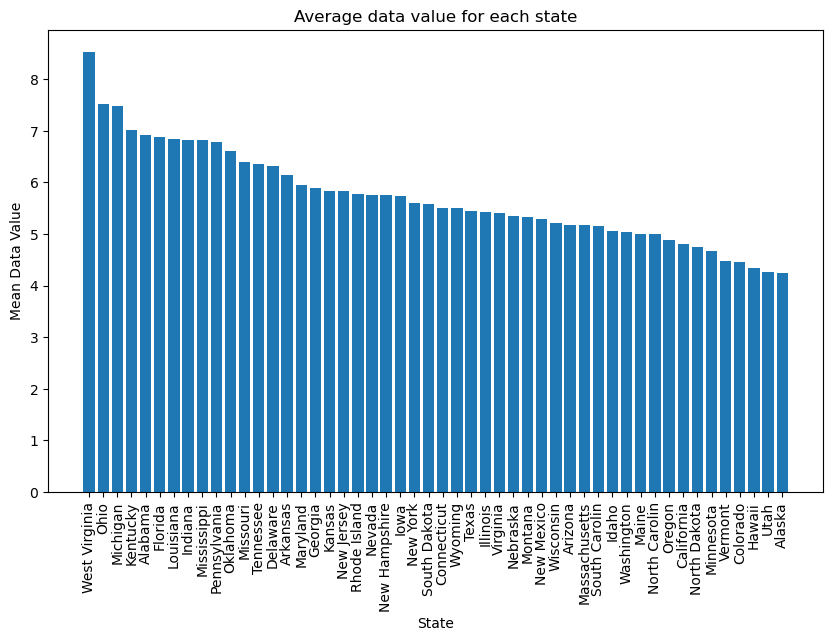

In [36]:
# Bar plot of the average data value for each state

plt.figure(figsize=(10, 6))
plt.bar(sorted_average_df['StateDesc'], sorted_average_df['Data_Value'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Mean Data Value")
plt.xlabel("State")
plt.title("Average data value for each state")
plt.show()

In [37]:
# Groups by state and the data value type and finds the average data value for each unique grouping

state_data_type = reduced_states_df.groupby(['StateDesc','Data_Value_Type'])['Data_Value'].mean()
state_data_type

StateDesc      Data_Value_Type        
Alabama        Age-adjusted prevalence    6.583333
               Crude prevalence           6.917949
Alaska         Age-adjusted prevalence    5.000000
               Crude prevalence           4.235714
Arizona        Age-adjusted prevalence    5.208333
                                            ...   
West Virginia  Crude prevalence           8.586957
Wisconsin      Age-adjusted prevalence    5.485714
               Crude prevalence           5.205160
Wyoming        Age-adjusted prevalence    5.200000
               Crude prevalence           5.523529
Name: Data_Value, Length: 100, dtype: float64

In [38]:
# Converts the series into a dataframe

state_data_type_df = state_data_type.reset_index()
state_data_type_df.head()

,StateDesc,Data_Value_Type,Data_Value
0,Alabama,Age-adjusted prevalence,6.583333
1,Alabama,Crude prevalence,6.917949
2,Alaska,Age-adjusted prevalence,5.000000
3,Alaska,Crude prevalence,4.235714
4,Arizona,Age-adjusted prevalence,5.208333


In [39]:
# Makes a dataframe for each data value type (age adjusted and crude) 

age_adjusted_df = state_data_type_df.loc[state_data_type_df['Data_Value_Type'] == 'Age-adjusted prevalence',:]
crude_df = state_data_type_df.loc[state_data_type_df['Data_Value_Type'] == 'Crude prevalence',:]

crude_df.head()

,StateDesc,Data_Value_Type,Data_Value
1,Alabama,Crude prevalence,6.917949
3,Alaska,Crude prevalence,4.235714
5,Arizona,Crude prevalence,5.180336
7,Arkansas,Crude prevalence,6.133333
9,California,Crude prevalence,4.793694


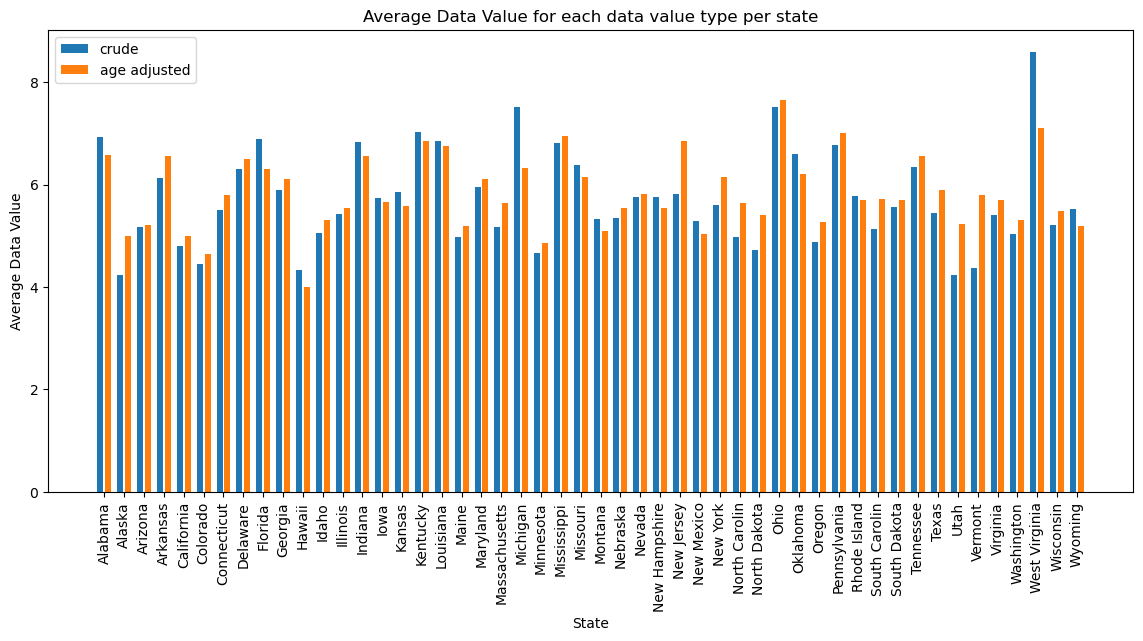

In [40]:
# Plots a bar of average values for each data value type per state 

state_names = crude_df['StateDesc']

crude_bar = crude_df['Data_Value']
age_adjusted_bar = age_adjusted_df['Data_Value']
  
X_axis = np.arange(len(state_names)) 
  
plt.figure(figsize=(14, 6))
plt.bar(X_axis - 0.2, crude_bar, 0.3, label = 'crude') 
plt.bar(X_axis + 0.2, age_adjusted_bar, 0.3, label = 'age adjusted') 
plt.legend()  
plt.xticks(X_axis, state_names, fontsize = 10, rotation = "vertical") 
plt.xlabel("State")
plt.ylabel("Average Data Value")
plt.title("Average Data Value for each data value type per state")

plt.show()

In [41]:
# Saves newly created dataframe in Resources folder to be used elsewhere
states_df.to_csv("Resources/states_df.csv", index = False)

In [42]:
# Reads in the obesity and inactivity dataframe
obesity_data = pd.read_csv("Resources/state_inactivity_obesity_source_data.csv")

obesity_data['Obesity_Percentage'] = obesity_data['Obesity_Percentage'].astype(float) * 100
obesity_data['Inactivity_Percentage'] = obesity_data['Inactivity_Percentage'].astype(float) * 100
obesity_data.head()

,StateDesc,Obesity_Percentage,Inactivity_Percentage
0,Alabama,37.693682,33.946511
1,Alaska,34.165793,21.009666
2,Arizona,29.421766,25.250418
3,Arkansas,33.130379,32.360820
4,California,24.780939,21.399161


In [43]:
obesity_inactivity_data_value_df = pd.merge(average_df,obesity_data, on = 'StateDesc')

obesity_inactivity_data_value_df.head()

,StateDesc,Data_Value,Obesity_Percentage,Inactivity_Percentage
0,Alabama,6.912325,37.693682,33.946511
1,Alaska,4.249123,34.165793,21.009666
2,Arizona,5.180664,29.421766,25.250418
3,Arkansas,6.150000,33.130379,32.360820
4,California,4.798212,24.780939,21.399161


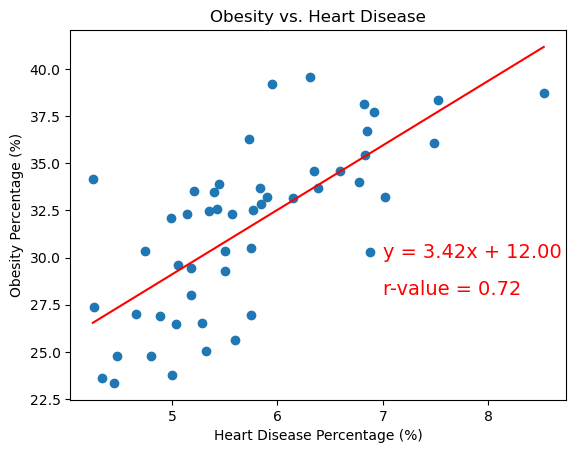

In [44]:
# Converts the data into float values
obesity_inactivity_data_value_df['Data_Value'] = obesity_inactivity_data_value_df['Data_Value'].astype(float)
obesity_inactivity_data_value_df['Obesity_Percentage'] = obesity_inactivity_data_value_df['Obesity_Percentage'].astype(float)

# Shows a scatterplot between heart disease data value and obesity
plt.scatter(obesity_inactivity_data_value_df['Data_Value'], obesity_inactivity_data_value_df['Obesity_Percentage'])
plt.xlabel('Heart Disease Percentage (%)')
plt.ylabel('Obesity Percentage (%)')
plt.title('Obesity vs. Heart Disease')

# Calculates slope, intercept, rval, pval, and std
slope, intercept, rval, pval, std = linregress(obesity_inactivity_data_value_df['Data_Value'],obesity_inactivity_data_value_df['Obesity_Percentage'])


# Creates strings that will be shown in the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_value_text = f'r-value = {rval:.2f}'

# Creates an array of the maximum and minimum x-values
x_min = obesity_inactivity_data_value_df['Data_Value'].min()
x_max = obesity_inactivity_data_value_df['Data_Value'].max()
x_values = x_min, x_max
x_values_array = np.array(x_values)

# Predicts y-values using the linear regression equation
y_pred = slope * x_values_array + intercept

# Plots the linear regression line and shows the string values determined above
plt.plot(x_values_array, y_pred, c = 'r')
plt.text(x = 7.0, y = 30, fontsize = 14, s = equation, c = 'r')
plt.text(x = 7.0, y = 28, fontsize = 14, s = r_value_text, c = 'r') 
plt.show()





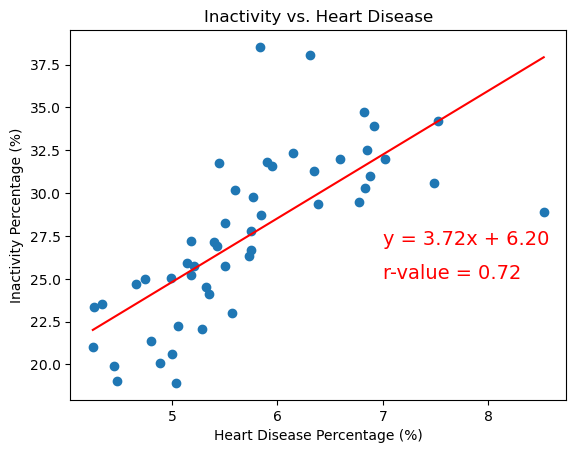

In [45]:
# Converts the data into float values
obesity_inactivity_data_value_df['Data_Value'] = obesity_inactivity_data_value_df['Data_Value'].astype(float)
obesity_inactivity_data_value_df['Inactivity_Percentage'] = obesity_inactivity_data_value_df['Inactivity_Percentage'].astype(float)

# Shows a scatterplot between heart disease data value and inactivity
plt.scatter(obesity_inactivity_data_value_df['Data_Value'], obesity_inactivity_data_value_df['Inactivity_Percentage'])
plt.xlabel('Heart Disease Percentage (%)')
plt.ylabel('Inactivity Percentage (%)')
plt.title('Inactivity vs. Heart Disease')

# Calculates slope, intercept, rval, pval, and std
slope, intercept, rval, pval, std = linregress(obesity_inactivity_data_value_df['Data_Value'],obesity_inactivity_data_value_df['Inactivity_Percentage'])


# Creates strings that will be shown in the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_value_text = f'r-value = {rval:.2f}'

# Creates an array of the maximum and minimum x-values
x_min = obesity_inactivity_data_value_df['Data_Value'].min()
x_max = obesity_inactivity_data_value_df['Data_Value'].max()
x_values = x_min, x_max
x_values_array = np.array(x_values)

# Predicts y-values using the linear regression equation
y_pred = slope * x_values_array + intercept

# Plots the linear regression line and shows the string values determined above
plt.plot(x_values_array, y_pred, c = 'r')
plt.text(x = 7.0, y = 27, fontsize = 14, s = equation, c = 'r')
plt.text(x = 7.0, y = 25, fontsize = 14, s = r_value_text, c = 'r') 
plt.show()


# Analysis

The first conclusion that can be drawn is by looking at the plot of the 500 cities. It seems as though the data is focused on cities on the west and east coasts. The center of the U.S. has less plot points, which means less cities are selected from this region. For this reason, it makes it difficult to conclude that any of the inferences that can be drawn from this data is able to represent the United States well. The second plot shows that the cities with the highest heart disease rates are on the eastern side of the United States. 

By looking at the bar plot of states and their respective heart disease rates, it is clear to see that the states with the highest heart disease rates are: West Virginia, Ohio, Michigan, Kentucky, and Alabama. On the opposite hand, the states with the lowest heart disease rates are: Alaska, Utah, Hawaii, Colorado, and Vermont. 

The bar plot of crude vs. age-adjusted data values for each state shows that there is no noticeable difference between the mean values in either group. So, using these two data groups together will not skew the data and the conclusions drawn will not be distorted.

The two scatterplots and best-fit lines lead to two different conclusions. The r-value for the obesity and heart disease rates is 0.72, which is also a strong positive correlation. A increase in obesity data values, for example, corresponds with a higher heart disease rate value. The r-value for the inactivity and heart disease rates is also 0.72, which is a strong positive correlation. This means that an increase in inactivity percentages is associated with an increased heart disease rates.   


# Income vs Heart Disease Analysis

In [46]:
# Dependencies
# Note that an API key is required for the Government Census data
from api_keys import census_key
import requests
import numpy as np
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st

In [47]:
# Creates an instance of the Census library
income_census = Census(
    census_key,
    year = 2017
)

# Heart Disease Diagnosis Rates vs. Per Capita Income By State

In [48]:
# Runs Census search to retrieve data on all states
state_income_census_data = income_census.acs5.get(
    (
        "NAME",
        "B19301_001E"
    ),
    {'for': 'state:*'}
)

# Converts data to DataFrame
state_income_census_pd = pd.DataFrame(state_income_census_data)

# Renames the columns
state_income_census_pd = state_income_census_pd.rename(
    columns = {"B19301_001E": "Per Capita Income"
              }
)

In [49]:
# Creates a dictionary of states and their per capita income
income_state_dict = state_income_census_pd[['NAME', 'Per Capita Income']].set_index('NAME').to_dict()

# Removes the per capita income index from the dictionary so the dictionary can later be applied to the heart disease DataFrame
income_state_dict = income_state_dict.pop('Per Capita Income')

In [50]:
# Retrieves and reads .csv data
heart_income_csv = Path('Resources/500_Cities__Coronary_heart_disease_among_adults_aged___18_years_20240317.csv')
heart_income_csv = pd.read_csv(heart_income_csv)

# Isolates the columns that are relevant to our analysis
heart_income_df = heart_income_csv[['StateDesc', 'CityName', 'Data_Value', 'UniqueID', 'PopulationCount', 'Data_Value_Type']]

# Sorts our DataFrame by population and data value type in descending order
heart_income_df = heart_income_df.sort_values(['PopulationCount', 'Data_Value_Type'], ascending=False)

# Removes duplicated city IDs, keeping the first occurence of each ID that has the highest population
# and crude prevalence data type
heart_income_df = heart_income_df.drop_duplicates(subset=['UniqueID'])
heart_income_df = heart_income_df[['StateDesc', 'CityName', 'Data_Value']]

heart_income_df

,StateDesc,CityName,Data_Value
2848,United States,NaN,6.4
18849,New York,New York,5.4
3646,California,Los Angeles,4.8
11156,Illinois,Chicago,5.2
25607,Texas,Houston,5.4
...,...,...,...
27285,Utah,Salt Lake City,NaN
27627,Virginia,Norfolk,NaN
27758,Utah,Salt Lake City,NaN
28721,Wisconsin,Madison,NaN


In [51]:
# Adds a duplicate StateDesc column
heart_income_df['Per Capita Income'] = heart_income_df.loc[:, 'StateDesc']

# Uses the dictionary to replace each state name in the duplicated column with each state's respective per capita income values
# Renames the duplicated column to Per Capita Income
heart_income_df['Per Capita Income'] = heart_income_df['Per Capita Income'].map(income_state_dict)

# Drops all rows that contain null values
heart_income_df = heart_income_df.dropna()
heart_income_df

,StateDesc,CityName,Data_Value,Per Capita Income
18849,New York,New York,5.4,35752.0
3646,California,Los Angeles,4.8,33128.0
11156,Illinois,Chicago,5.2,32924.0
25607,Texas,Houston,5.4,28985.0
22521,Pennsylvania,Philadelphia,6.5,31476.0
...,...,...,...,...
4965,California,Redlands,6.6,33128.0
16253,Nevada,Henderson,5.7,28450.0
21449,Oklahoma,Oklahoma City,7.4,26461.0
23544,Tennessee,Chattanooga,6.5,27277.0


The correlation coefficient between per capita income and heart disease is -0.19.
There is no correlation between income and heart disease rates.


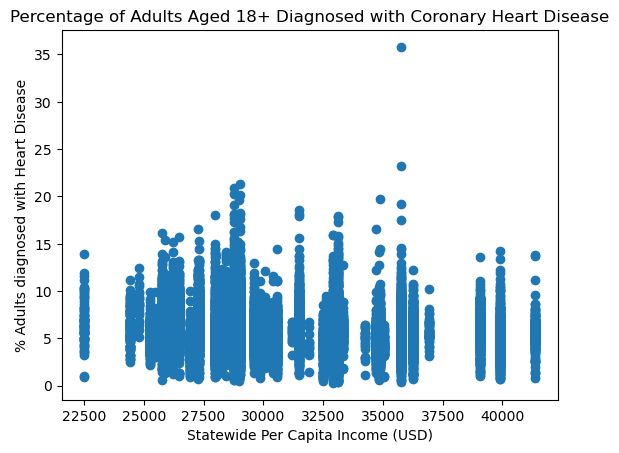

In [52]:
# Calculates the correlation coefficient between income and heart disease rates
income_correlation = st.pearsonr(heart_income_df['Per Capita Income'], heart_income_df['Data_Value'])

# Generates a scatter plot of income vs. heart disease rates
plt.scatter(heart_income_df['Per Capita Income'], heart_income_df['Data_Value'])
plt.xlabel('Statewide Per Capita Income (USD)')
plt.ylabel('% Adults diagnosed with Heart Disease')
plt.title('Percentage of Adults Aged 18+ Diagnosed with Coronary Heart Disease')

# Prints our analysis
print(f'The correlation coefficient between per capita income and heart disease is {round(income_correlation[0],2)}.')
print(f'There is no correlation between income and heart disease rates.')
plt.show()

# Heart Disease Diagnosis Rates vs. Per Capita Income By County

In [53]:
# Runs Census search to retrieve data on all counties in the US
county_income_census_data = income_census.acs5.get(
    (
        "NAME",
        "B19301_001E"
    ),
    {'for': 'county:*'}
)

# Converts data to DataFrame
county_income_census_pd = pd.DataFrame(county_income_census_data)

# Renames the columns
county_income_census_pd = county_income_census_pd.rename(
    columns = {"B19301_001E": "Per Capita Income"
              }
)
county_income_census_pd

,NAME,Per Capita Income,state,county
0,"Ellis County, Oklahoma",27272.0,40,045
1,"Grady County, Oklahoma",27334.0,40,051
2,"Payne County, Oklahoma",22785.0,40,119
3,"Pottawatomie County, Oklahoma",22284.0,40,125
4,"Creek County, Oklahoma",24056.0,40,037
...,...,...,...,...
3215,"Pontotoc County, Oklahoma",23862.0,40,123
3216,"Roger Mills County, Oklahoma",27797.0,40,129
3217,"Woodward County, Oklahoma",27413.0,40,153
3218,"Cherokee County, Oklahoma",19799.0,40,021


In [54]:
# Splits the county names of the county DataFrame to isolate the county's name and state
county_income_census_pd[['NAME', 'state']] = county_income_census_pd['NAME'].str.split(' County, ', n=1, expand=True)
county_income_census_pd

,NAME,Per Capita Income,state,county
0,Ellis,27272.0,Oklahoma,045
1,Grady,27334.0,Oklahoma,051
2,Payne,22785.0,Oklahoma,119
3,Pottawatomie,22284.0,Oklahoma,125
4,Creek,24056.0,Oklahoma,037
...,...,...,...,...
3215,Pontotoc,23862.0,Oklahoma,123
3216,Roger Mills,27797.0,Oklahoma,129
3217,Woodward,27413.0,Oklahoma,153
3218,Cherokee,19799.0,Oklahoma,021


In [55]:
# Isolates the relevant columns for our analysis and renames columns to prepare for merging
county_income_census_pd = county_income_census_pd[['NAME', 'Per Capita Income', 'state']].rename(columns={'NAME':'county_name',
                                                                                                         'state':'state_name'})
                                           

In [56]:
# Generates a DataFrame containing all cities in the US and the counties/states they belong to
city_county_csv = Path('Resources/uscities.csv')
city_county_csv = pd.read_csv(city_county_csv)
city_county_df = city_county_csv[['city', 'state_name', 'county_name']]
city_county_df

,city,state_name,county_name
0,New York,New York,Queens
1,Los Angeles,California,Los Angeles
2,Chicago,Illinois,Cook
3,Miami,Florida,Miami-Dade
4,Houston,Texas,Harris
...,...,...,...
31115,Kohatk,Arizona,Pinal
31116,Ironville,Pennsylvania,Blair
31117,Newkirk,New Mexico,Guadalupe
31118,Falcon Village,Texas,Starr


In [57]:
# Generates a DataFrame containing all of the cities included in the heart disease study and
# their respective states
heart_cities_df = heart_income_csv[['CityName', 'StateDesc']].drop_duplicates(subset=['CityName', 'StateDesc'])

# Renames columns for merging
heart_cities_df = heart_cities_df.rename(columns={'CityName':'city', 'StateDesc':'state_name'})

# Merges our DataFrames to produce a new DataFrame containing only our studied cities, their states,
# and their counties
merged_heart_cities_df = heart_cities_df.merge(city_county_df, how='left')

# Checks our merged DataFrame for null values
# https://stackoverflow.com/questions/14247586/how-to-select-rows-with-one-or-more-nulls-from-a-pandas-dataframe-without-listin
merged_heart_cities_df[merged_heart_cities_df.isnull().any(axis=1)]

,city,state_name,county_name
8,Washington,District of C,NaN
23,Cary,North Carolin,NaN
24,Greensboro,North Carolin,NaN
25,High Point,North Carolin,NaN
26,Winston-Salem,North Carolin,NaN
34,Rock Hill,South Carolin,NaN
59,NaN,United States,NaN
162,San Buenaventura (Ventura),California,NaN
255,Boise City,Idaho,NaN
376,Greenville,North Carolin,NaN


In [58]:
# Identifies the city name used in city_county_df so that the null value above can be resolved
city_county_df.loc[city_county_df['city']=='San Buenaventura']

,city,state_name,county_name
416,San Buenaventura,California,Ventura


In [59]:
# Identifies the city name used in city_county_df so that the null value above can be resolved
city_county_df.loc[city_county_df['city']=='Boise']

,city,state_name,county_name
96,Boise,Idaho,Ada


In [60]:
# Replaces the mismatched city names
heart_cities_df = heart_cities_df.replace('San Buenaventura (Ventura)', 'San Buenaventura').replace('Boise City', 'Boise')

# Drops the remaining row with a null values
heart_cities_df = heart_cities_df.dropna()

# Creates a new, corrected DataFrame with no null values
corrected_heart_cities_df = heart_cities_df.merge(city_county_df, how='left')

In [61]:
# Merges the DataFrame containing the studied cities/states/counties and the DataFrame
# containing the income values for each county
reduced_county_income = corrected_heart_cities_df.merge(county_income_census_pd, how='left')

# Drops the rows with null values since we don't have per capita income data for these locations
reduced_county_income = reduced_county_income.dropna()

reduced_county_income

,city,state_name,county_name,Per Capita Income
0,Hayward,California,Alameda,41363.0
1,Huntsville,Alabama,Madison,34232.0
2,Chandler,Arizona,Maricopa,30186.0
3,Surprise,Arizona,Maricopa,30186.0
4,Bellflower,California,Los Angeles,30798.0
...,...,...,...,...
495,Appleton,Wisconsin,Outagamie,30858.0
496,Green Bay,Wisconsin,Brown,29874.0
497,Kenosha,Wisconsin,Kenosha,28996.0
498,Cheyenne,Wyoming,Laramie,31554.0


In [62]:
# Creates a dictionary from the DataFrame created above which contains 
# a city key and a per capita income value
county_income_dict = reduced_county_income[['city', 'Per Capita Income']].set_index('city').to_dict()

# Removes 'Per Capita Income' index from the dictionary for later processing
county_income_dict = county_income_dict.pop('Per Capita Income')

In [63]:
# References the DataFrame we created in the statewide summary
income_summary = heart_income_df[['StateDesc', 'CityName', 'Data_Value']]

# Duplicates the CityName column of this DataFrame and renames the duplicated column 'Per Capita Income'
income_summary['Per Capita Income'] = income_summary.loc[:, 'CityName']

# Uses the dictionary created above to replace the values in the duplicated row with
# each city's countywide per capita income
income_summary['Per Capita Income'] = income_summary['Per Capita Income'].map(county_income_dict)

# Drops the null values in the DataFrame where per capita income data was unavailable
income_summary = income_summary.dropna()

income_summary

,StateDesc,CityName,Data_Value,Per Capita Income
18849,New York,New York,5.4,28814.0
3646,California,Los Angeles,4.8,30798.0
11156,Illinois,Chicago,5.2,33722.0
25607,Texas,Houston,5.4,30856.0
22521,Pennsylvania,Philadelphia,6.5,24811.0
...,...,...,...,...
4965,California,Redlands,6.6,22867.0
16253,Nevada,Henderson,5.7,27719.0
21449,Oklahoma,Oklahoma City,7.4,29127.0
23544,Tennessee,Chattanooga,6.5,29711.0


The correlation coefficient between per capita income and heart disease is -0.19.
There is no correlation between income and heart disease rates.


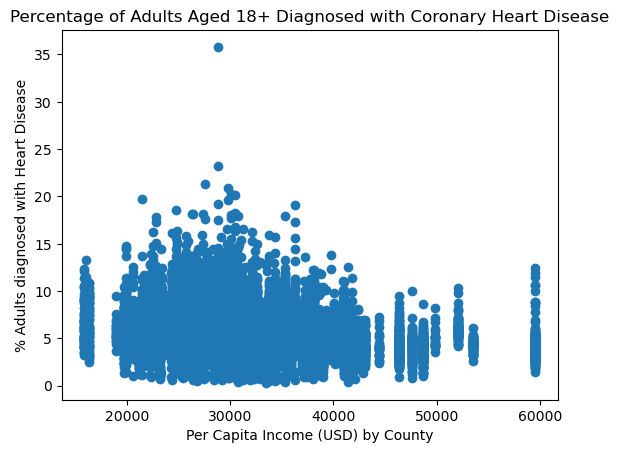

In [64]:
# Calculates the correlation coefficient between income and heart disease rates
county_income_correlation = st.pearsonr(income_summary['Per Capita Income'], income_summary['Data_Value'])

# Generates a scatter plot of income vs. heart disease rates
plt.scatter(income_summary['Per Capita Income'], income_summary['Data_Value'])
plt.xlabel('Per Capita Income (USD) by County')
plt.ylabel('% Adults diagnosed with Heart Disease')
plt.title('Percentage of Adults Aged 18+ Diagnosed with Coronary Heart Disease')

# Prints our analysis
print(f'The correlation coefficient between per capita income and heart disease is {round(income_correlation[0],2)}.')
print(f'There is no correlation between income and heart disease rates.')
plt.show()

## In Summary

### Conclusions

The data used in this analysis suggests that there may be no correlation between income and heart disease diagnosis rates. However, there are limitations of this analysis that warrant further investigation.

### Limitations

The study conducted on heart disease rates stated that this data was collected from the 500 largest cities in the US.  Given that large, metropolitan areas tend to have higher incomes than average, this analysis may not have had any data representative of truly low income areas.

The per capita income data for this analysis was only obtained for the state and county levels.  The countywide per capita incomes are just an approximation of each city's income and may not fully represent the actual per capita incomes of each city.

# Heart Disease vs. Mental Health Rates Analysis

Analyze Data over 500 cities in the United States to find if there is a correlation of poor mental health to heart disease rates.

In [65]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#file to load
mentalHealth_df = Path("Resources/500_Cities_Mental_health_.csv")
heartDisease_df = Path("Resources/states_df.csv")

heartDisease_df = pd.read_csv(heartDisease_df)
mentalHealth_df = pd.read_csv(mentalHealth_df)


### Data Cleaning

In [66]:
# Shows all the unique values under the State Description column
mentalHealth_df['StateDesc'].unique()
# Drop Values in Array that aren't states
mental_states = mentalHealth_df.drop(mentalHealth_df.loc[mentalHealth_df['StateDesc'] == 'District of C', :].index)
mental_states = mental_states.drop(mentalHealth_df.loc[mentalHealth_df['StateDesc'] == 'United States', :].index)

## Mental Health & Heart Disease DataFrames

In [67]:
#Select Index
mental_health = mental_states[["StateDesc", 'CityName', "Data_Value", "PopulationCount","Measure"]] 

#convert data value (%) to real number and add to dataframe
percent = mental_health["Data_Value"]*0.01
poormentalHealth = percent * mental_health['PopulationCount']
poormentalHealth = round(poormentalHealth)
poormentalHealth = poormentalHealth.rename('TotalPoorMentalHealth')
mental_health = pd.concat([mental_health, poormentalHealth], axis=1)

# Drops all rows that contain null values
mental_healthDf = mental_health.dropna()

mental_healthDf

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalPoorMentalHealth
0,Connecticut,Stamford,10.0,122643,Mental health not good for >=14 days among adu...,12264.0
1,Iowa,Iowa City,13.2,67862,Mental health not good for >=14 days among adu...,8958.0
2,Louisiana,Lake Charles,16.6,71993,Mental health not good for >=14 days among adu...,11951.0
3,Minnesota,Minneapolis,11.4,382578,Mental health not good for >=14 days among adu...,43614.0
4,Minnesota,Rochester,10.1,106769,Mental health not good for >=14 days among adu...,10784.0
...,...,...,...,...,...,...
29001,Wisconsin,Milwaukee,18.4,2829,Mental health not good for >=14 days among adu...,521.0
29002,Wisconsin,Milwaukee,18.3,1451,Mental health not good for >=14 days among adu...,266.0
29003,Wisconsin,Milwaukee,19.7,4185,Mental health not good for >=14 days among adu...,824.0
29004,Wisconsin,Milwaukee,13.4,4913,Mental health not good for >=14 days among adu...,658.0


In [68]:
# Select Index
heart_disease = heartDisease_df[["StateDesc",'CityName', "Data_Value", "PopulationCount","Measure"]]

#convert data value (%) to real number & add to dataframe
Mpercent = heart_disease["Data_Value"]*0.01
CHeartDisease = Mpercent * heart_disease['PopulationCount']
CHeartDisease = round(CHeartDisease)
CHeartDisease = CHeartDisease.rename('TotalHeartDisease')
heart_disease = pd.concat([heart_disease, CHeartDisease], axis=1)

# Drops all rows that contain null values
heart_diseaseDf = heart_disease.dropna()


heart_diseaseDf

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalHeartDisease
0,California,Hayward,4.8,144186,Coronary heart disease among adults aged >=18 ...,6921.0
1,Alabama,Huntsville,6.7,180105,Coronary heart disease among adults aged >=18 ...,12067.0
2,Arizona,Chandler,3.8,236123,Coronary heart disease among adults aged >=18 ...,8973.0
3,Arizona,Surprise,5.9,117517,Coronary heart disease among adults aged >=18 ...,6934.0
4,California,Bellflower,5.3,76616,Coronary heart disease among adults aged >=18 ...,4061.0
...,...,...,...,...,...,...
28818,Wisconsin,Milwaukee,6.4,3197,Coronary heart disease among adults aged >=18 ...,205.0
28819,Washington,Tacoma,5.9,4855,Coronary heart disease among adults aged >=18 ...,286.0
28820,Wisconsin,Green Bay,5.8,2669,Coronary heart disease among adults aged >=18 ...,155.0
28821,Wisconsin,Milwaukee,6.5,3732,Coronary heart disease among adults aged >=18 ...,243.0


## Heart Disease Summary

In [69]:
# Calculate total number of states
total_states = heart_diseaseDf.StateDesc.nunique()
# Calculate total number of cities
total_cities = heart_diseaseDf.CityName.nunique()
# Calculate the total population
population = heart_diseaseDf.PopulationCount.sum()
# Calculate the average heart disease count
heart_disease = heart_diseaseDf.TotalHeartDisease.sum()

avgheart_disease = heart_disease.mean()
#Calulate Total heart Disease Count
totalHeart_disease = heart_disease.sum()
# Calculate the percentage of adults 18+ with Heart Disease
percent_heart = totalHeart_disease/population 

In [70]:
heartDisease_summary = pd.DataFrame({"Total States" : [total_states], 'Total Cities' : [total_cities], 
                        "Total Population" : [population], "Average Heart Disease Count" : [avgheart_disease], 
                        "Total Heart Disease Count" : [totalHeart_disease], "% Adults with Heart Disease": [percent_heart]})
#formatting
heartDisease_summary["% Adults with Heart Disease"] = heartDisease_summary["% Adults with Heart Disease"].map("{:.2%}".format)

heartDisease_summary            

,Total States,Total Cities,Total Population,Average Heart Disease Count,Total Heart Disease Count,% Adults with Heart Disease
0,50,473,307245461,16936661.0,16936661.0,5.51%


## Mental Health Summary

In [71]:
# Calculate total number of states
Mtotal_states = mental_healthDf.StateDesc.nunique()
# Calculate total number of cities
Mtotal_cities = mental_healthDf.CityName.nunique()
# Calculate the total population
Mpopulation = mental_healthDf.PopulationCount.sum()
# Calculate average Mental Health not good for >=14 days
mental_health = mental_healthDf.TotalPoorMentalHealth.sum()

avgmental_health = mental_health.mean()
#Calulate Total heart Disease Count
totalMental_health = mental_health.sum()
# Calculate the percentage of adults 18+ with not good mental health >=14 days
percent_mental = totalMental_health/Mpopulation

In [72]:
mentalHealth_summary = pd.DataFrame({"Total States" : [Mtotal_states], 'Total Cities' : [Mtotal_cities], 
                        "Total Population" : [Mpopulation], "Average Poor Mental Health Count" : [avgmental_health], 
                        "Total Adults with Poor Mental Health" : [totalMental_health], "% Adults with Poor Mental Health": [percent_mental]})
#formatting
mentalHealth_summary["% Adults with Poor Mental Health"] = mentalHealth_summary["% Adults with Poor Mental Health"].map("{:.2%}".format)

mentalHealth_summary    

,Total States,Total Cities,Total Population,Average Poor Mental Health Count,Total Adults with Poor Mental Health,% Adults with Poor Mental Health
0,50,473,307245461,41925464.0,41925464.0,13.65%


## State Summary

In [73]:
# Using the aggregation method, produce summary statistics for heart disease per state
heart_diseaseDf.groupby(['StateDesc'])['TotalHeartDisease'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
StateDesc,,,,,
Alabama,550.764706,187.0,4.445130e+06,2108.347688,111.585593
Alaska,682.473684,209.0,6.064367e+06,2462.593516,326.178479
Arizona,589.057617,187.5,1.568922e+07,3960.962489,123.780078
Arkansas,702.757812,269.0,3.091031e+06,1758.132782,155.398452
California,587.199599,195.0,1.803519e+07,4246.785958,57.362817
Colorado,474.066011,159.0,4.209964e+06,2051.819716,76.895195
Connecticut,617.105932,211.0,2.453216e+06,1566.274406,101.955780
Delaware,522.500000,190.5,1.400135e+06,1183.273062,232.058940
Florida,755.596620,263.0,8.720996e+06,2953.133329,80.048646


In [74]:
# Using the aggregation method, produce summary statistics for poor mental health per state
mental_healthDf.groupby(['StateDesc'])['TotalPoorMentalHealth'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
StateDesc,,,,,
Alabama,1284.689076,435.0,2.350458e+07,4848.152427,256.591436
Alaska,1743.982456,608.0,3.584164e+07,5986.788793,792.969547
Arizona,1536.178711,516.0,1.052384e+08,10258.577742,320.580554
Arkansas,1727.445312,623.5,1.706826e+07,4131.375550,365.165458
California,1540.532385,520.0,1.193095e+08,10922.888750,147.539263
Colorado,1284.134831,436.5,3.011938e+07,5488.112289,205.675704
Connecticut,1509.584746,540.0,1.419726e+07,3767.924895,245.271019
Delaware,1386.769231,504.5,9.683446e+06,3111.823611,610.278820
Florida,1635.621602,553.0,4.275517e+07,6538.743734,177.241434


## Best Mental Health & Lowest Heart Disease Rates by City

In [75]:
# 10 Best Mental Health Cities
high_mental = mental_healthDf.sort_values('Data_Value')
high_mental.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalPoorMentalHealth
6911,California,Santa Barbara,4.2,333,Mental health not good for >=14 days among adu...,14.0
1568,California,Carlsbad,4.2,1006,Mental health not good for >=14 days among adu...,42.0
5032,California,Oceanside,5.2,80,Mental health not good for >=14 days among adu...,4.0
1884,California,Fremont,5.8,4029,Mental health not good for >=14 days among adu...,234.0
25054,Texas,Dallas,5.8,467,Mental health not good for >=14 days among adu...,27.0
23902,Tennessee,Memphis,5.9,126,Mental health not good for >=14 days among adu...,7.0
12020,Illinois,Schaumburg,5.9,1010,Mental health not good for >=14 days among adu...,60.0
26819,Texas,San Antonio,5.9,855,Mental health not good for >=14 days among adu...,50.0
10161,Hawaii,Honolulu,5.9,913,Mental health not good for >=14 days among adu...,54.0
26461,Texas,Lewisville,6.0,96,Mental health not good for >=14 days among adu...,6.0


In [76]:
# 10 Lowest Heart Disease Cities
lowest_heartDisease = heart_diseaseDf.sort_values('Data_Value')
lowest_heartDisease.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalHeartDisease
10677,Illinois,Aurora,0.3,51,Coronary heart disease among adults aged >=18 ...,0.0
1341,California,Berkeley,0.4,1215,Coronary heart disease among adults aged >=18 ...,5.0
17249,New York,Albany,0.4,5203,Coronary heart disease among adults aged >=18 ...,21.0
4921,California,Pomona,0.4,536,Coronary heart disease among adults aged >=18 ...,2.0
24364,Texas,Corpus Christi,0.5,1267,Coronary heart disease among adults aged >=18 ...,6.0
2481,California,Long Beach,0.5,1863,Coronary heart disease among adults aged >=18 ...,9.0
3608,California,Los Angeles,0.5,9344,Coronary heart disease among adults aged >=18 ...,47.0
5861,California,San Diego,0.5,3435,Coronary heart disease among adults aged >=18 ...,17.0
10216,Hawaii,Honolulu,0.5,341,Coronary heart disease among adults aged >=18 ...,2.0
19500,New York,Rochester,0.6,2320,Coronary heart disease among adults aged >=18 ...,14.0


## Worst Mental Health & Highest Heart Disease Rates by City

In [77]:
# 10 Worst Mental Health`Cities
poor_mental = mental_healthDf.sort_values('Data_Value', ascending=False)
poor_mental.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalPoorMentalHealth
20717,Ohio,Cleveland,32.6,2212,Mental health not good for >=14 days among adu...,721.0
13534,Louisiana,New Orleans,32.3,1238,Mental health not good for >=14 days among adu...,400.0
23427,South Carolin,Rock Hill,30.0,1762,Mental health not good for >=14 days among adu...,529.0
15082,Michigan,Flint,30.0,2152,Mental health not good for >=14 days among adu...,646.0
20677,Ohio,Cincinnati,29.9,1916,Mental health not good for >=14 days among adu...,573.0
20929,Ohio,Cleveland,29.8,1927,Mental health not good for >=14 days among adu...,574.0
9655,Florida,Tampa,29.5,5160,Mental health not good for >=14 days among adu...,1522.0
20817,Ohio,Cleveland,29.4,1884,Mental health not good for >=14 days among adu...,554.0
12675,Indiana,Muncie,29.0,6863,Mental health not good for >=14 days among adu...,1990.0
23901,Tennessee,Nashville,28.8,3127,Mental health not good for >=14 days among adu...,901.0


In [78]:
# 10 Highest Heart Disease Cities
bottom_heartDisease = heart_diseaseDf.sort_values('Data_Value', ascending=False)
bottom_heartDisease.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalHeartDisease
19254,New York,New York,35.8,512,Coronary heart disease among adults aged >=18 ...,183.0
19056,New York,New York,23.2,1246,Coronary heart disease among adults aged >=18 ...,289.0
21491,Ohio,Dayton,21.3,549,Coronary heart disease among adults aged >=18 ...,117.0
9587,Florida,Tampa,20.9,140,Coronary heart disease among adults aged >=18 ...,29.0
9116,Florida,Pembroke Pines,20.3,7569,Coronary heart disease among adults aged >=18 ...,1537.0
20681,Ohio,Cleveland,20.2,956,Coronary heart disease among adults aged >=18 ...,193.0
27564,Washington,Yakima,19.7,227,Coronary heart disease among adults aged >=18 ...,45.0
24088,Texas,Dallas,19.6,467,Coronary heart disease among adults aged >=18 ...,92.0
19051,New York,New York,19.2,72,Coronary heart disease among adults aged >=18 ...,14.0
8540,Florida,Boynton Beach,19.1,240,Coronary heart disease among adults aged >=18 ...,46.0


## Mental Health Rates by State

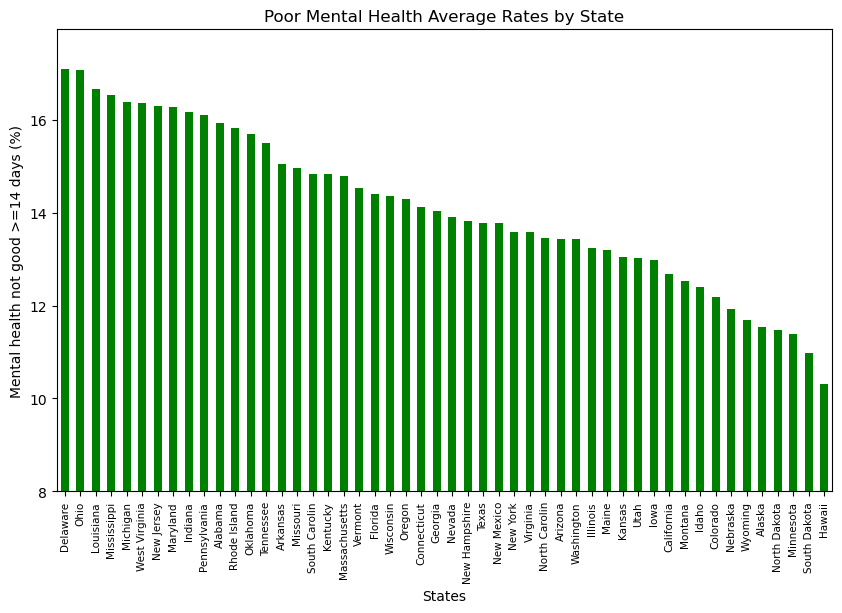

In [79]:
# Group State & Mental Health Data
mentalhealth_bar = mental_healthDf.groupby(['StateDesc'])['Data_Value'].mean()

plt.figure(figsize=(10,6))
# plot the group in decsending order 
mentalhealth_bar.sort_values(ascending=False).plot.bar(color='g')


# Label x,y axis
plt.xlabel('States')
plt.ylabel('Mental health not good >=14 days (%)')
plt.title('Poor Mental Health Average Rates by State')

#resize/rescale
plt.xticks(fontsize=7.5)
plt.ylim(8)

plt.show()

## Heart Disease Rates by State

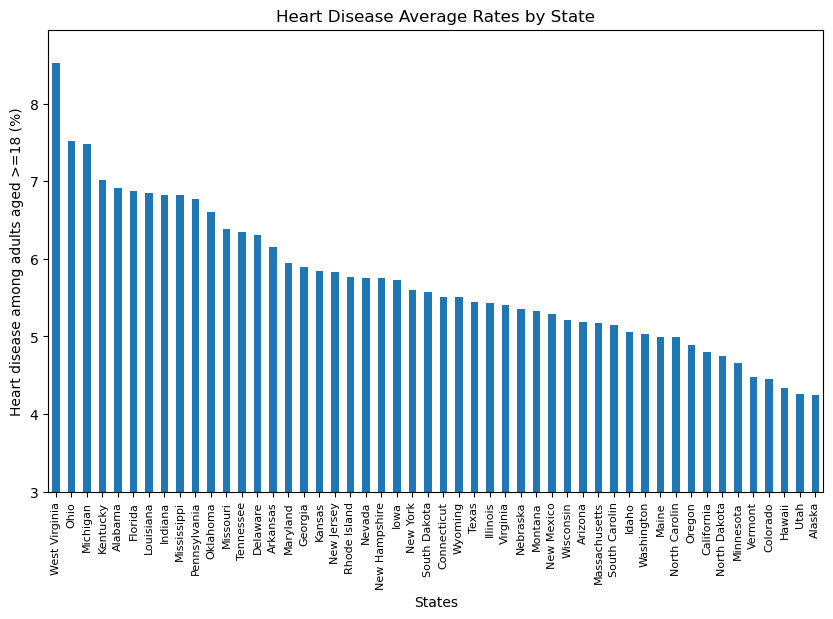

In [80]:
# Group State & Mental Health Data
heartdisease_bar = heart_diseaseDf.groupby(['StateDesc'])['Data_Value'].mean()

plt.figure(figsize=(10, 6))
# plot the group in decsending order 
heartdisease_bar.sort_values(ascending=False).plot.bar()

# Label x,y axis & title
plt.xlabel('States')
plt.ylabel('Heart disease among adults aged >=18 (%)')
plt.title('Heart Disease Average Rates by State')

#resize/rescale
plt.ylim(3)
plt.xticks(fontsize=8)

plt.show()

## Heart Disease & Mental Health Rates by State

<Figure size 600x1000 with 0 Axes>

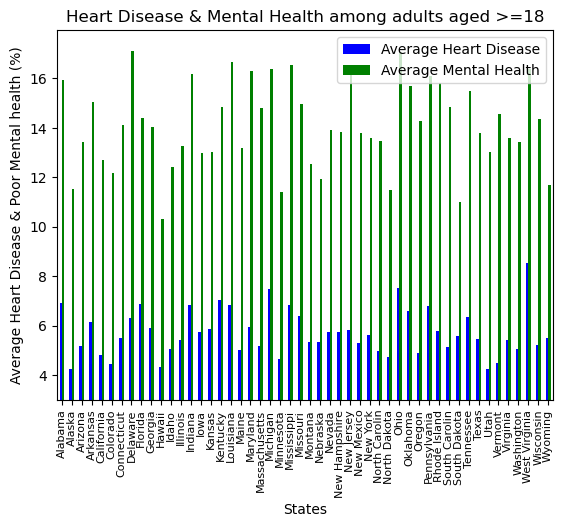

In [81]:
plt.figure(figsize=(6, 10))
mylabels=['Average Heart Disease', 'Average Mental Health']
# plot the group in decsending order 
pd.concat([heartdisease_bar, mentalhealth_bar], axis=1).plot.bar(color=('b','g'))



# Label x,y axis, legend & title
plt.xlabel('States')
plt.ylabel('Average Heart Disease & Poor Mental health (%)')
plt.title('Heart Disease & Mental Health among adults aged >=18')
plt.legend(labels=mylabels)

#resize/rescale
plt.xticks(fontsize=8)
plt.ylim(3)

plt.show()

The correlation coefficient between Heart Disease & Mental Health is 0.75
The correlation between Heart Disease & Mental Health is Strong


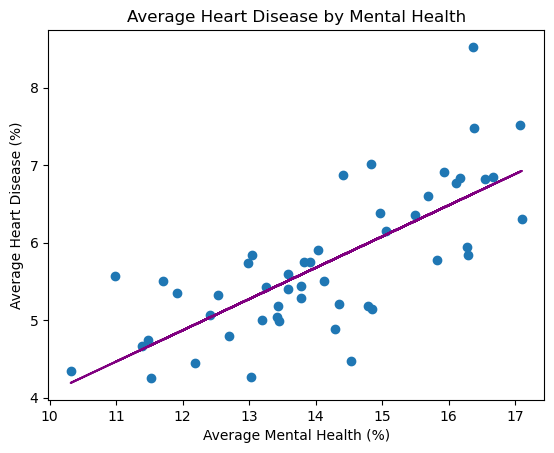

In [82]:
# scatter plot of heart disease vs mental health
plt.scatter(mentalhealth_bar, heartdisease_bar)
# find p values
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(mentalhealth_bar, heartdisease_bar)
p_fit = p_slope*mentalhealth_bar+p_int

#plot slope line & label x,y and title
plt.plot(mentalhealth_bar, p_fit, color = "purple")
plt.xlabel('Average Mental Health (%)')
plt.ylabel('Average Heart Disease (%)')
plt.title("Average Heart Disease by Mental Health")

#print analysis
print(f'The correlation coefficient between Heart Disease & Mental Health is {round(p_r,2)}')
print(f'The correlation between Heart Disease & Mental Health is Strong')

plt.show()

## Conclusion


The scatter plot and line of best fit shows there is a strong positive correlation between poor mental health and heart disease rates with an r-value of .75. Which shows as mental health gets worse heart disease rates get higher.

The bar charts show the states with top 5 heart disease rates are West Virgina, Ohio, Michigan, Kentucky, & Alabama as the top 5 states with poor mental health are Delware, Ohio, Louisiana, Missisipi, & West Virgina 
The states with the lowest 5 heart disease rates are Alaska, Utah, Hawaii, Colorado, & Vermont as the 5 states with the best mental health are Hawaii, South Dakota, Minesotta, North Dakota, & Alaska.

There are limitations within this data set, it is based on 500 larger cities in the United States so it isnt a direct reflection of the entire population of the United States. 